## Import python library

In [15]:
import cv2
import numpy as np
import matplotlib
import math
from matplotlib import pyplot as plt

## Load image in gray scale format

(512, 512)
262144
uint8


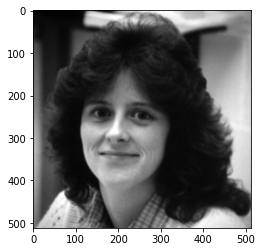

In [41]:
# cameraman lena_gray_512  mandril_gray  house  jetplane lake livingroom  peppers_gray pirate walkbridge   woman_blonde
# woman_darkhair

img = cv2.imread('/Users/kunal/python_code/standard_test_images/woman_darkhair.tif',cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(img.size)
print(img.dtype)
plt.imshow(img,cmap = 'gray', interpolation = 'bicubic')
plt.show()

## Compress image by removing alternate pixel value

In [42]:
def compress_images(image_array):
    new_image_array = image_array[ : : 2,: : 2]
    return new_image_array
    

##  Display the compressed image

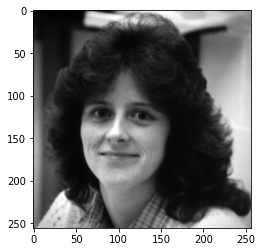

(256, 256)
uint8
65536


In [43]:
compressed_images = compress_images(img)
plt.imshow(compressed_images, cmap = 'gray', interpolation = 'bicubic')
plt.show()

print(compressed_images.shape)
print(compressed_images.dtype)
print(compressed_images.size)

## Mean Square Error between two images

In [25]:
def mean_squrare_error(image_matrix1,image_matrix2):
    diff_matrix = image_matrix1 - image_matrix2
    sum_of_matrix = np.vdot(diff_matrix,diff_matrix)/(diff_matrix.size)
    return sum_of_matrix

## Pick_Signal_to_Noise_Ratio to calculate accuracy of interpolation

In [26]:
def Pick_Signal_to_Noise_Ratio(mse):
    PSNR = (20*np.log10(255/math.sqrt(mse)))
    return PSNR

## Linear Regression to calculate optimal parameters

In [44]:
def find_optimal_theta(X,Y):
    Theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    return Theta

## Creating Input and Label for linear regression

In [45]:
# using four nearest neighbour
def get_X_Y(image_matrix,length):
    k =0
    m = (length-2)*(length-2)
    Y = np.zeros((m,1))
    X = np.zeros((m,4))
    for i in range(1,length-1):
        for j in range(1,length-1):
            Y[k] = image_matrix[i,j]
            X[k,0] = image_matrix[i-1,j-1]
            X[k,1] = image_matrix[i-1,j+1]
            X[k,2] = image_matrix[i+1,j-1]
            X[k,3] = image_matrix[i+1,j+1]
            k = k+1
    return (X,Y)

In [29]:
X,Y = get_X_Y(compressed_images,256)

In [30]:
find_optimal_theta(X,Y)

array([[0.29479021],
       [0.20472131],
       [0.208415  ],
       [0.29407369]])

## Constructing Image using compressed image and alpha value

In [32]:
def construct_image_length(alpha1,alpha2,alpha3,alpha4,compressed_image,length):
    constructed_image = np.zeros((length,length))
    constructed_image[::2,::2] = compressed_image
    
    #print(constructed_image[505:511,505:511])
    constructed_image[:,length-1] = constructed_image[:,length-2]
    constructed_image[length-1,:] = constructed_image[length-2,:]

    for i in range(1,length-2,2):
        for j in range(1,length-2,2):
            constructed_image[i,j] = alpha1*constructed_image[i-1,j-1]+alpha2*constructed_image[i-1,j+1]+alpha3*constructed_image[i+1,j-1]+alpha4*constructed_image[i+1,j+1]
    for i in range(1,length-2,2):
        constructed_image[i,length-1] = (alpha1*constructed_image[i-1,length-2]+alpha3*constructed_image[i+1,length-2])*2
        constructed_image[length-1,i] = (alpha1*constructed_image[length-2,i-1]+alpha2*constructed_image[length-2,i+1])*2
        constructed_image[0,i] = (alpha1*constructed_image[0,i-1]+alpha3*constructed_image[0,i+1]+alpha4*constructed_image[1,i])*4/3
        constructed_image[i,0] = (alpha2*constructed_image[i-1,0]+alpha3*constructed_image[i,1]+alpha4*constructed_image[i+1,0])*4/3    
    constructed_image[length-1,length-1] = constructed_image[length-2,length-2]
    for i in range(1,length-2,2):
        for j in range(2,length-1,2):
            constructed_image[i,j] = alpha1*constructed_image[i,j-1]+alpha2*constructed_image[i-1,j]+alpha3*constructed_image[i,j+1]+alpha4*constructed_image[i+1,j]
            constructed_image[j,i] = alpha1*constructed_image[j,i-1]+alpha2*constructed_image[j-1,i]+alpha3*constructed_image[j,i+1]+alpha4*constructed_image[j+1,i]        
    return constructed_image

## Predicting new image and checking PSNR value

In [46]:
opt_list = find_optimal_theta(X,Y)
newimages = (construct_image_length(opt_list[0],opt_list[1],opt_list[2],opt_list[3],compressed_images,512))
print(Pick_Signal_to_Noise_Ratio(mean_squrare_error(img,newimages)))

39.749002248634284


## Predicting new image using uniform alpha values

In [47]:
newimages = (construct_image_length(0.25,0.25,0.25,0.25,compressed_images,512))
print(Pick_Signal_to_Noise_Ratio(mean_squrare_error(img,newimages)))


39.939038681425224


## Predicted image 

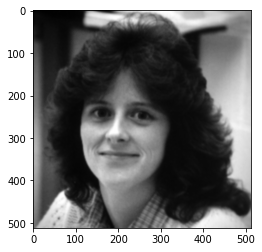

(512, 512)


In [49]:
plt.imshow(newimages, cmap = 'gray', interpolation = 'bicubic')
plt.show()
print(img.shape)

## PSNR value after removing the Border of both images

In [51]:
print(Pick_Signal_to_Noise_Ratio(mean_squrare_error(img[:511,:511],newimages[:511,:511])))

40.06459853061119
